In [2]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [3]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.Baraffe15()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F200W']
filters = ['m_jwst_F115W', 'm_jwst_F200W']
iso_dir = 'isochrones/'
metallicity = 0

In [9]:
mass = 1.0
level_age = 1.6e6
log_age = np.log10(level_age)

In [10]:
# Create age arrays
level_age_arr = [1.5e6, 2.0e6]
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[6.17609126 6.30103   ]
[1500000.0, 2000000.0]


In [11]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

isochrone generation done


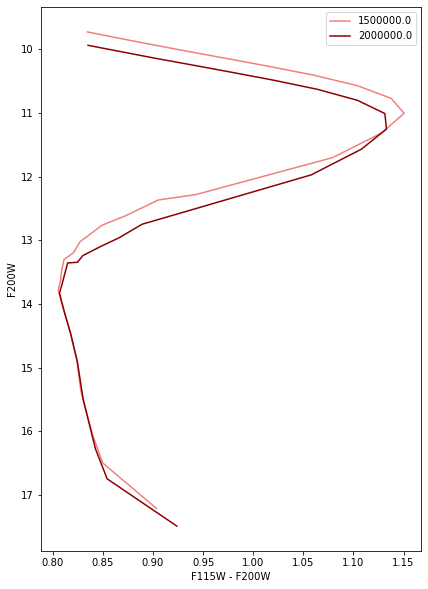

In [12]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 3:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()
py.legend()

In [15]:
import sys
sys.path.append('/scratch/wyz5rge/synthetic-hr/')
import interpolator as interpolator

level_age_myr = level_age / 1e6

star = interpolator.interpolate(level_age_myr, mass, instances, log_age_arr, filters)

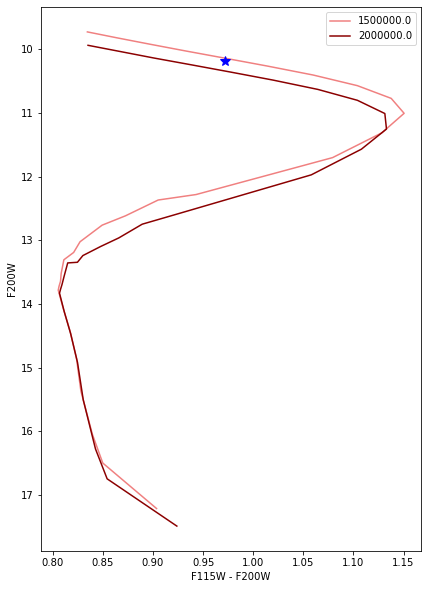

In [18]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 3:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')

py.plot(star[3]-star[4], star[4], marker='*', color='b', markersize=10)
        
py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()
py.legend()

In [19]:
iso1p6 = synthetic.IsochronePhot(np.log10(1.6e6), AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)

Isochrone generation took 1.072360 s.
Making photometry for isochrone: log(t) = 6.20  AKs = 0.00  dist = 410
     Starting at:  2024-03-18 20:50:29.690283   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2280 K  m_jwst_F115W = 18.18
Starting filter: jwst,F200W   Elapsed time: 0.52 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2280 K  m_jwst_F200W = 17.27
      Time taken: 1.03 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


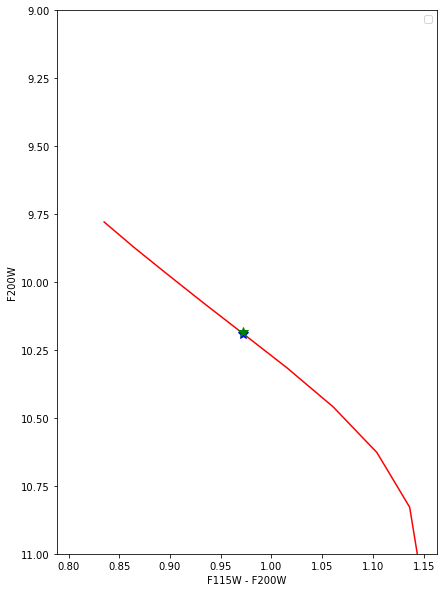

In [28]:
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 1.0) == min(abs(iso1p6.points['mass'] - 1.0)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10)

py.plot(star[3]-star[4], star[4], marker='*', color='g', markersize=10)

py.ylim(9, 11)

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()
py.legend()